Total Stiffness Matrix:
 [[ 18900.  18900. -18900.  18900.      0.      0.]
 [ 18900.  25200. -18900.  12600.      0.      0.]
 [-18900. -18900.  37800.      0. -18900.  18900.]
 [ 18900.  12600.      0.  50400. -18900.  12600.]
 [     0.      0. -18900. -18900.  18900. -18900.]
 [     0.      0.  18900.  12600. -18900.  25200.]]
Displacement:
 [[ 0.        ]
 [ 0.        ]
 [-0.00092593]
 [-0.00019841]
 [ 0.        ]
 [ 0.00079365]]
reac_forces:
 [[ 13.75]
 [ 15.  ]
 [-20.  ]
 [  0.  ]
 [  6.25]
 [  0.  ]]
SF and BM of element 1: 
 [[ 13.75]
 [ 15.  ]
 [-13.75]
 [ 12.5 ]]


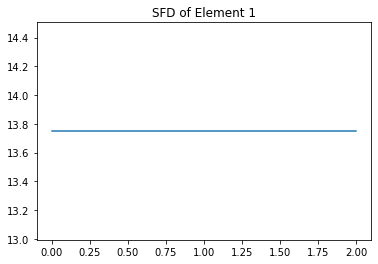

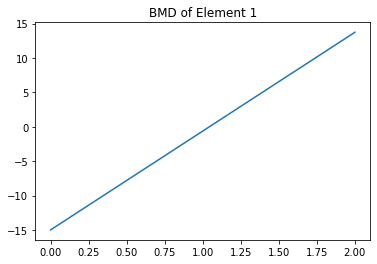

SF and BM of element 2: 
 [[ -6.25]
 [-12.5 ]
 [  6.25]
 [  0.  ]]


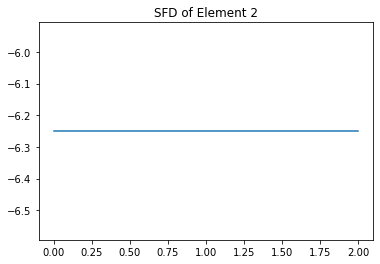

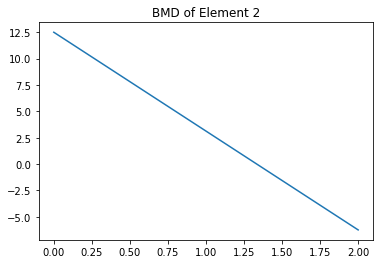

In [1]:
import numpy as np
import matplotlib.pyplot as plt
  
E=210000000 #young's modulus
I=60*10**-6 #Moment of Interia
P=20
L=[2,2]
total_nodes = 3
u = [0,0,1,1,0,1]
F = np.array([-P,0,0]).reshape((3,1))

stiff_matrix = np.zeros((2*total_nodes,2*total_nodes))
stiff_mat_k={}
for j in range(len(L)):
  temp=np.array([[12,6*L[j],-12, 6*L[j]],[6*L[j], 4*L[j]**2, -6*L[j], 2*L[j]**2],[-12, -6*L[j], 12, -6*L[j]],[6*L[j],2*L[j]**2, -6 *L[j], 4*L[j]**2]])
  stiff_mat_k[j] = np.round((E*I/(L[j]**3)) * temp,0)

for i in range(len(L)):
  stiff_matrix[i+i:i+i+4, i+i:i+i+4] += stiff_mat_k[i]

print("Total Stiffness Matrix:\n",stiff_matrix)


iter = 0
for i in u:
  if i==1:
    iter+=1

u_reduced = []
for i in range(2*total_nodes):
  for j in range(2*total_nodes):
    if u[i]*u[j] == 1:
      u_reduced.append(stiff_matrix[i][j])
u_reduced = np.array(u_reduced).reshape((iter,iter))
#print(u_reduced)

m_rotation = np.linalg.solve(u_reduced, F)
a=0
b=0
m_disp=[]
for i in u:
  if i == 1:
    m_disp.append(m_rotation[a][0])
    a+=1
  else:
    m_disp.append(u[b])
  b+=1
m_disp = np.array(m_disp).reshape((2*total_nodes,1))
print("Displacement:\n",m_disp)
reac_forces=np.matmul(stiff_matrix, m_disp)
print("reac_forces:\n",reac_forces)

for i in range(len(L)):
  mat_forces = np.matmul(stiff_mat_k[i],m_disp[i+i:i+i+4])
  print('SF and BM of element ' + str(i+1) +': \n', mat_forces)
  #xValue=[0,L[i]]
  #yValue=[mat_forces[0],mat_forces[0]]
  plt.figure()
  plt.title('SFD of Element '+str(i+1))
  plt.plot([0,L[i]],[mat_forces[0],mat_forces[0]])
  plt.figure()
  plt.title('BMD of Element '+str(i+1))
  plt.plot([0,L[i]],[-1*mat_forces[1],-1*mat_forces[2]])
  plt.show()

